In [ ]:
import cv2
from ultralytics import YOLO
def detectar_camaras():
    index = 0
    arr = []
    while True:
        cap = cv2.VideoCapture(index)
        if not cap.read()[0]:
            break
        else:
            arr.append(index)
        cap.release()
        index += 1
    return arr

# Uso de la función
camaras_disponibles = detectar_camaras()
print("Cámaras disponibles:", camaras_disponibles)

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Usuario\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Cámaras disponibles: [0]


In [ ]:

# Instancia del modelo YOLO con los pesos especificados
pesos_yolo = "yolov8n.pt" # Usamos la ruta relativa
model = YOLO(pesos_yolo)

# Verificar si la cámara está disponible
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("No se pudo acceder a la cámara.")
else:
    try:
        # Realiza la detección de objetos en el flujo de video de la cámara del computador
        results = model(source=0, show=True, conf=0.3, save=True)
    except Exception as e:
        print("Ocurrió un error al realizar la detección de objetos:", e)
    finally:
        cap.release()


1/1: 0... Success  (inf frames of shape 640x480 at 30.00 FPS)


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 480x640 1 person, 139.1ms
0: 480x640 1 person, 67.2ms
0: 480x640 1 person, 63.8ms
0: 480x640 1 person, 66.9ms
0: 480x640 1 person, 64.9ms
0: 480x640 1 person, 64.3ms
0: 480x640 1 person, 61.5ms
0: 480x640 1 person, 65.5ms
0: 480x640 1 person, 72.3ms
0: 480x640 1 person, 67.4ms
0: 480x640 1 person, 65.3ms
0: 480x640 1 person, 69.7ms
0: 480x640 1 person, 64.5ms
0: 480x640 1 person, 64.4ms
0:

In [1]:
# Tracking
from ultralytics import YOLO
# Configure the tracking parameters and run the tracker
model = YOLO('yolov8n.pt')
# Seleccionamos la clase 66 (keyboard)
results = model.track(source="0", conf=0.3, iou=0.5, show=True, classes=[66])

KeyboardInterrupt: 

In [29]:
!rm -rf datasets\\train\\images
!rm -rf datasets\\valid\\images
!rm -rf datasets\\test\\images
!rm -rf datasets
!rm -rf Dice.v2-medium-color.yolov8

In [ ]:
from sklearn.model_selection import train_test_split
import shutil
import os
import zipfile

dataset_ZIP_path = "dataset.zip"

dataset_path = dataset_ZIP_path[:-4]
if not os.path.exists(dataset_path):
    # Create a directory to store the dataset
    os.makedirs(dataset_path)
    # Unzip the dataset in the created directory

    with zipfile.ZipFile(dataset_ZIP_path, "r") as zip_ref:
        zip_ref.extractall(dataset_path)
if not os.path.exists("datasets"):
    os.makedirs("datasets")

Dataset split into train, val, and test sets.


In [ ]:
# !pip install ultralytics

In [3]:

import zipfile
import os
from ultralytics import YOLO
import torch
# Load a model
model = YOLO("yolov8n.pt")


# Train the model
train_results = model.train(
    data=dataset_ZIP_path[:-4] + "/data.yaml",  # path to dataset YAML
    epochs=50,  # number of training epochs
    imgsz=640,  # training image size
    device= "cuda" if torch.cuda.is_available() else "cpu",  # CPU or GPU
)

# Evaluate model performance on the validation set
metrics = model.val()



New https://pypi.org/project/ultralytics/8.3.86 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.85  Python-3.12.7 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-11400 2.60GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=Dice.v2-medium-color.yolov8/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

100%|██████████| 755k/755k [00:00<00:00, 6.68MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning D:\github repositories\bigData\1CEIABDTA - M2D\Modelos de Inteligencia artificial\TAREA 6 (24-25) DETECCIÓN DE OBJETOS CON YOLO\datasets\train\labels... 0 images, 430 backgrounds, 0 corrupt: 100%|██████████| 430/430 [00:00<00:00, 946.22it/s]

train: WARNING  No labels found in D:\github repositories\bigData\1CEIABDTA - M2D\Modelos de Inteligencia artificial\TAREA 6 (24-25) DETECCIN DE OBJETOS CON YOLO\datasets\train\labels.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


train: New cache created: D:\github repositories\bigData\1CEIABDTA - M2D\Modelos de Inteligencia artificial\TAREA 6 (24-25) DETECCIN DE OBJETOS CON YOLO\datasets\train\labels.cache
WARNING  No labels found in D:\github repositories\bigData\1CEIABDTA - M2D\Modelos de Inteligencia artificial\TAREA 6 (24-25) DETECCIN DE OBJETOS CON YOLO\datasets\train\labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


val: Scanning D:\github repositories\bigData\1CEIABDTA - M2D\Modelos de Inteligencia artificial\TAREA 6 (24-25) DETECCIÓN DE OBJETOS CON YOLO\datasets\valid\labels... 0 images, 144 backgrounds, 0 corrupt: 100%|██████████| 144/144 [00:00<00:00, 977.07it/s]

val: WARNING  No labels found in D:\github repositories\bigData\1CEIABDTA - M2D\Modelos de Inteligencia artificial\TAREA 6 (24-25) DETECCIN DE OBJETOS CON YOLO\datasets\valid\labels.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
val: New cache created: D:\github repositories\bigData\1CEIABDTA - M2D\Modelos de Inteligencia artificial\TAREA 6 (24-25) DETECCIN DE OBJETOS CON YOLO\datasets\valid\labels.cache
WARNING  No labels found in D:\github repositories\bigData\1CEIABDTA - M2D\Modelos de Inteligencia artificial\TAREA 6 (24-25) DETECCIN DE OBJETOS CON YOLO\datasets\valid\labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to runs\detect\train10\labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train10
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G          0      127.6          0          0        640:  30%|██▉       | 8/27 [00:28<01:08,  3.59s/it]


KeyboardInterrupt: 


image 1/1 /content/prueba/OIP.jpg: 640x640 (no detections), 1354.1ms
Speed: 12.5ms preprocess, 1354.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


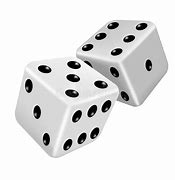


image 1/1 /content/prueba/OIP (2).jpg: 640x640 (no detections), 1017.1ms
Speed: 28.6ms preprocess, 1017.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


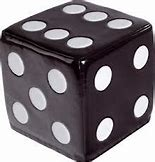


image 1/1 /content/prueba/OIP (1).jpg: 640x640 (no detections), 332.8ms
Speed: 9.0ms preprocess, 332.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


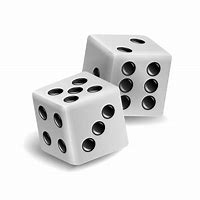

Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train8/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (5.9 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 1.7s, saved as 'runs/detect/train8/weights/best.onnx' (11.7 MB)

Export complete (2.3s)
Results saved to /content/runs/detect/train8/weights
Predict:         yolo predict task=detect model=runs/detect/train8/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train8/weights/best.onnx imgsz=640 data=Dice.v2-medium-color.yolov8/data.yaml  
Visualize:       https://netron.app


In [42]:
def detectObject(path_to_image: str):
    # Perform object detection on an image
    if not os.path.exists(path_to_image):
        print("La imagen no existe.")
        return
    results = model(path_to_image)
    results[0].show()
    return results

for img in os.listdir("prueba/"):
    if not img.endswith(('.png', '.jpg', '.jpeg')):
        continue
    detectObject("prueba/" + img)

# Export the model to ONNX format
path = model.export(format="onnx")  # return path to exported model